In [1]:
!git clone https://github.com/SaritKatzenelbogen/mlcourse mlcourse

Cloning into 'mlcourse'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 60 (delta 23), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (60/60), done.


In [54]:
# standard imports
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt
import pandas as pd
%matplotlib inline

# import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
# fetch original mnist dataset
from sklearn.datasets import fetch_openml
from matplotlib.colors import Normalize
import seaborn as sb


In [10]:
#full dataset classification
# normalise x values
X_data = images/255.0
# set y as the targets
Y = targets

#split data to train and test
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.15, random_state=42)

Text(0, 0.5, 'Accuracy')

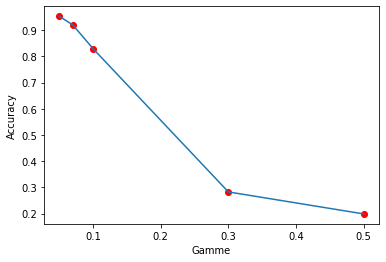

In [30]:
#1
param_C = 100
param_gamma = [0.05,0.07,0.1,0.3,0.5]
accuracy=[]
for gamma in param_gamma:
  classifier = svm.SVC(C=param_C,gamma=gamma)
  classifier.fit(X_train, y_train)
  predicted = classifier.predict(X_test)
  accuracy.append(metrics.accuracy_score(expected, predicted))
plt.plot(param_gamma,accuracy)
plt.scatter(param_gamma,accuracy,c="red")
plt.xlabel("Gamme")
plt.ylabel("Accuracy")


Text(0, 0.5, 'Accuracy')

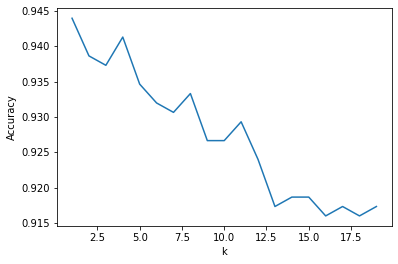

In [35]:
#2
accuracy=[]
for i in range(1,20):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)
  predicted = neigh.predict(X_test)
  accuracy.append(metrics.accuracy_score(y_test, predicted))
plt.plot(list(range(1,20)),accuracy)
plt.xlabel("k")
plt.ylabel("Accuracy")


In [111]:
#3
print("THE BEST PARAMATERS K= "+str(4)+" GAMME= "+str(0.05))

THE BEST PARAMATERS K= 4 GAMME= 0.05


In [38]:
#4
start_time = dt.datetime.now()
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train)
# stop timing, print elapsed
end_time = dt.datetime.now() 
elapsed_time= end_time - start_time
print('Elapsed learning KNN {}'.format(str(elapsed_time)))

start_time = dt.datetime.now()
classifier = svm.SVC(C=param_C,gamma=0.05)
classifier.fit(X_train, y_train)# stop timing, print elapsed
end_time = dt.datetime.now() 
elapsed_time= end_time - start_time
print('Elapsed learning SVM {}'.format(str(elapsed_time)))


Elapsed learning KNN 0:00:00.010386
Elapsed learning SVM 0:00:07.074403


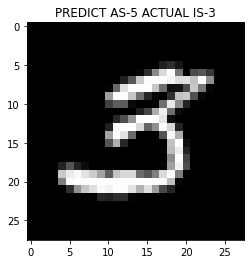

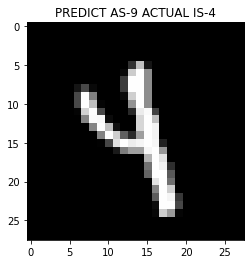

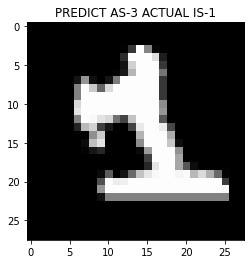

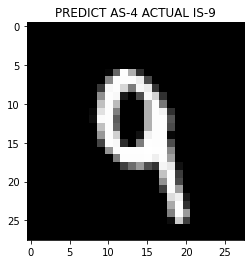

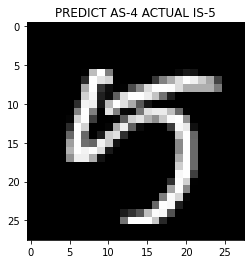

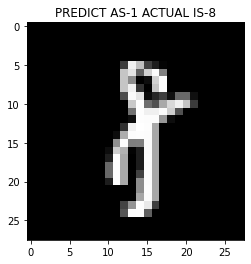

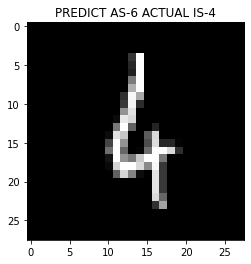

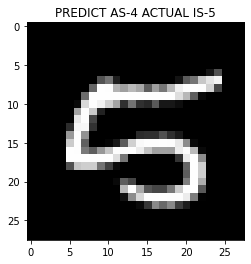

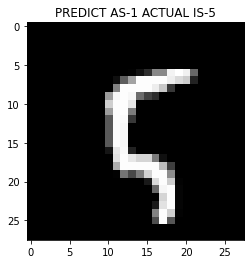

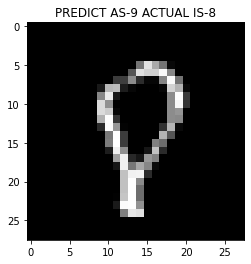

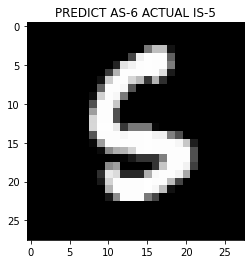

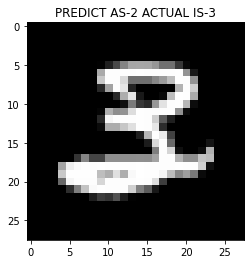

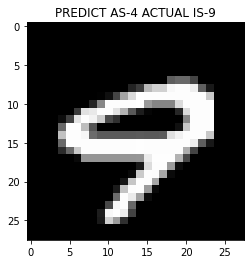

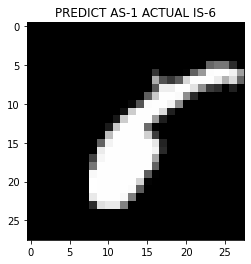

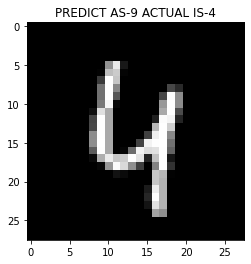

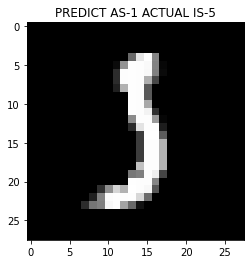

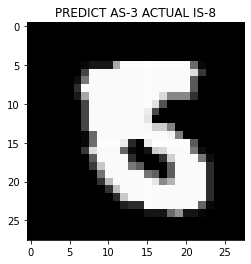

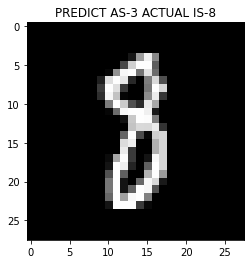

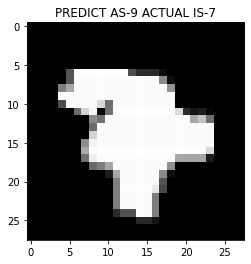

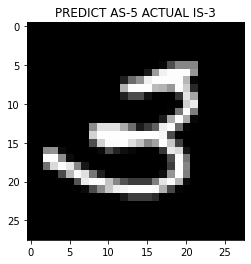

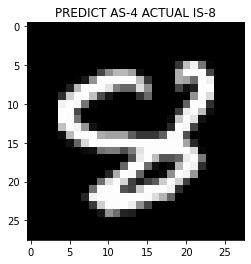

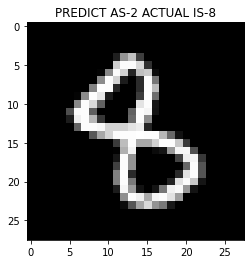

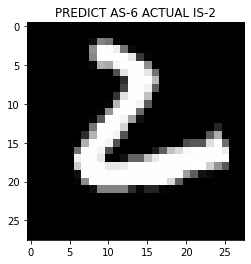

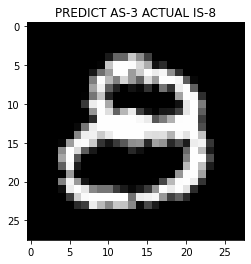

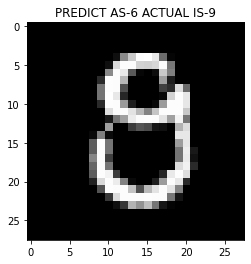

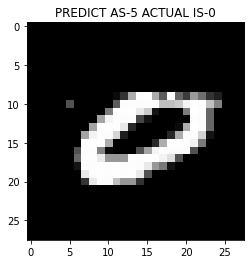

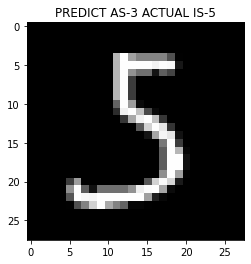

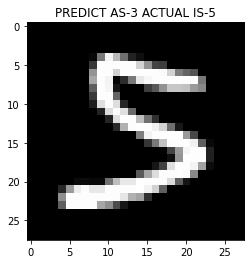

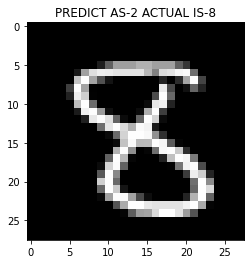

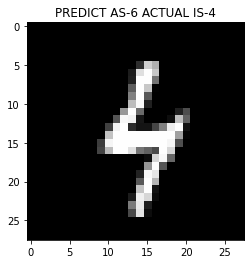

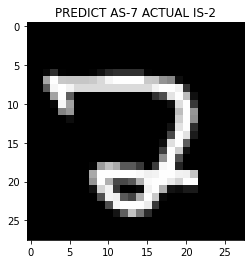

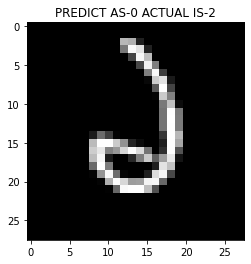

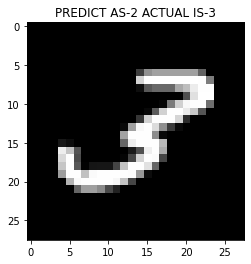

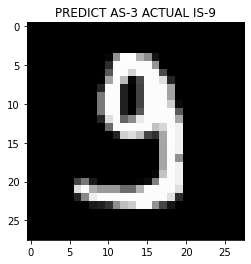

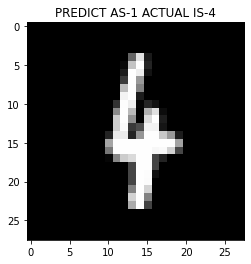

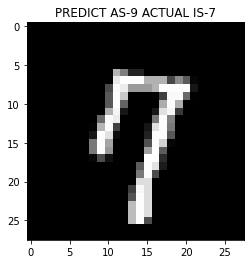

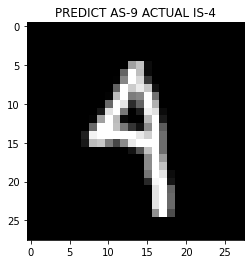

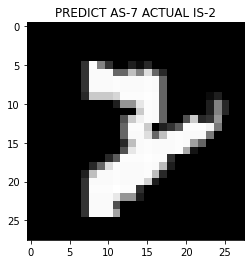

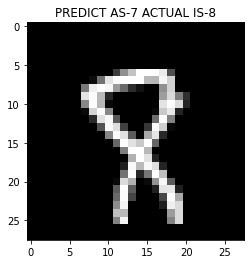

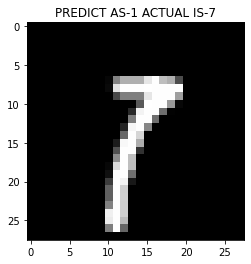

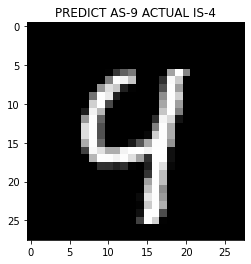

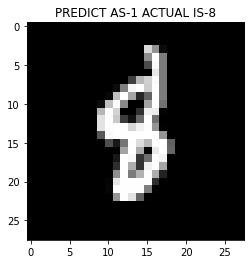

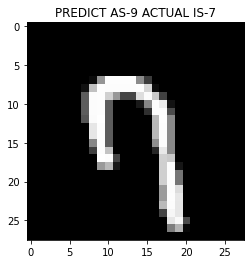

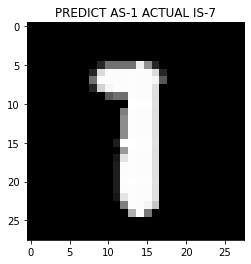

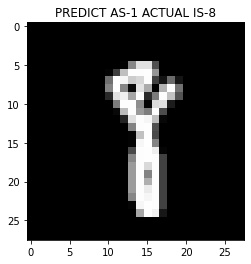

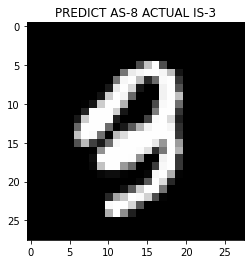

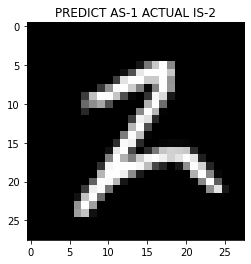

In [109]:
#5
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
predicted = neigh.predict(X_test)
expected=list(y_test)
for i in range(0,len(expected)):
  if expected[i] != predicted[i]:
    plt.imshow(X_test[i].reshape((28, 28)), cmap='gray',interpolation='nearest')
    plt.title("PREDICT AS-"+str(predicted[i])+" ACTUAL IS-"+str(expected[i]))
    plt.show()
